# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [31]:
# NECESSARY PACKAGES AND LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
# IMPORT CSV FILE
data = pd.read_csv('phivolcs_earthquake_data.csv')
data = pd.DataFrame(data)
data

,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location
0,2016-01-01 00:40:00,17.34,120.30,023,3.0,015 km N 87° W of San Esteban (Ilocos Sur)
1,2016-01-01 05:06:00,14.65,123.12,017,3.3,054 km N 42° E of Paracale (Camarines Norte)
2,2016-01-01 13:24:00,09.76,125.46,012,2.4,005 km S 42° W of Surigao City
3,2016-01-01 15:01:00,17.30,120.27,026,2.9,018 km S 81° W of San Esteban (Ilocos Sur)
4,2016-01-01 20:27:00,08.89,126.28,024,3.0,004 km S 44° W of Cagwait (Surigao del Sur)
...,...,...,...,...,...,...
91673,2024-08-31 21:54:00,10.16,126.62,010,3.1,062 km N 76° E of Burgos (Surigao Del Norte)
91674,2024-08-31 22:11:00,13.85,120.54,163,3.0,010 km N 76° W of Calatagan (Batangas)
91675,2024-08-31 22:36:00,13.68,120.64,090,1.5,017 km S 03° E of Calatagan (Batangas)
91676,2024-08-31 22:49:00,13.76,120.16,008,1.7,010 km N 63° W of Looc (Occidental Mindoro)


In [7]:
# CLEANING DATA
data = data[data["Latitude"].str.match(r'^\d')]
data = data[data["Longitude"].str.match(r'^\d')]
data = data[data["Depth_In_Km"].str.match(r'^\d')]
data = data[data["Location"].str.match(r'^\d')]


In [9]:
# CONVERT ALL COLUMNS TO NUMERIC
data["Latitude"] = pd.to_numeric(data["Latitude"])
data["Longitude"] = pd.to_numeric(data["Longitude"])
data["Depth_In_Km"] = pd.to_numeric(data["Depth_In_Km"])
data["Magnitude"] = pd.to_numeric(data["Magnitude"])

features = data[['Latitude', 'Longitude', 'Depth_In_Km', 'Magnitude']]

In [10]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

db = DBSCAN(eps=0.5, min_samples=5)
db_clusters = db.fit_predict(features_scaled)

data['DBScan_Cluster'] = db_clusters

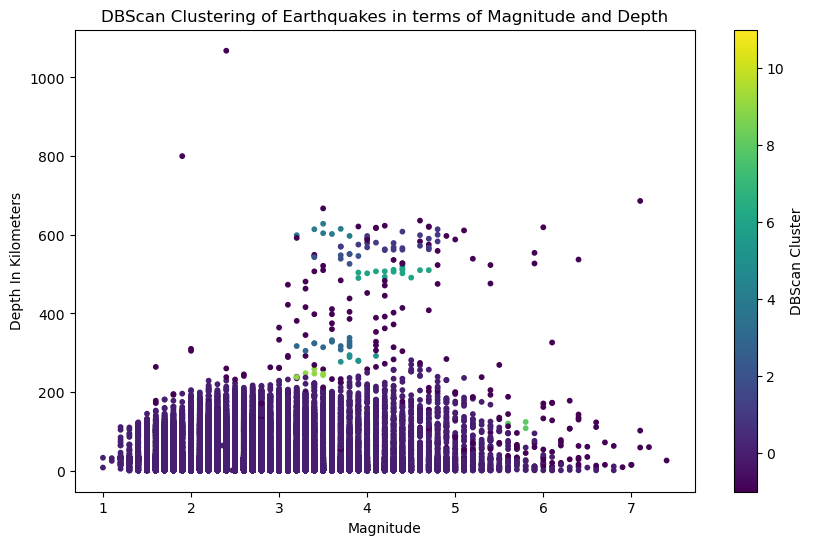

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Magnitude'], data['Depth_In_Km'], c=data['DBScan_Cluster'], cmap='viridis', s=10)
plt.colorbar(label='DBScan Cluster')
plt.xlabel('Magnitude')
plt.ylabel('Depth In Kilometers')
plt.title('DBScan Clustering of Earthquakes in terms of Magnitude and Depth')
plt.show()

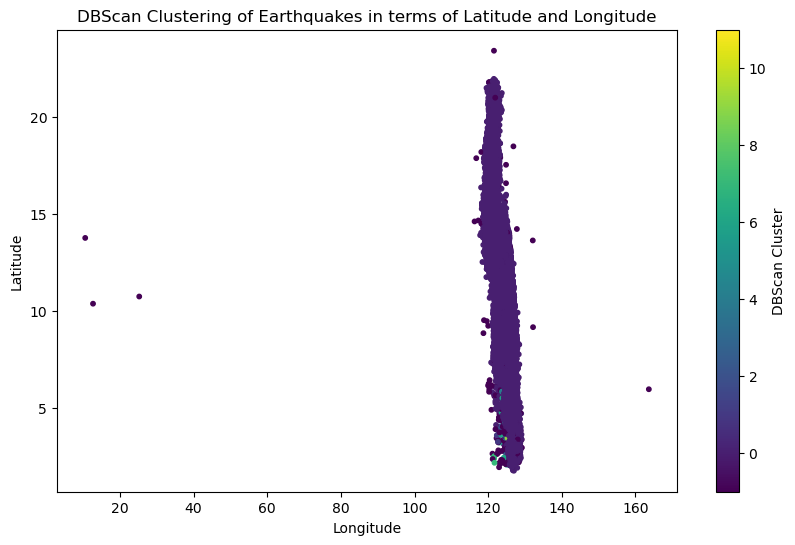

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['DBScan_Cluster'], cmap='viridis', s=10)
plt.colorbar(label='DBScan Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBScan Clustering of Earthquakes in terms of Latitude and Longitude')
plt.show()

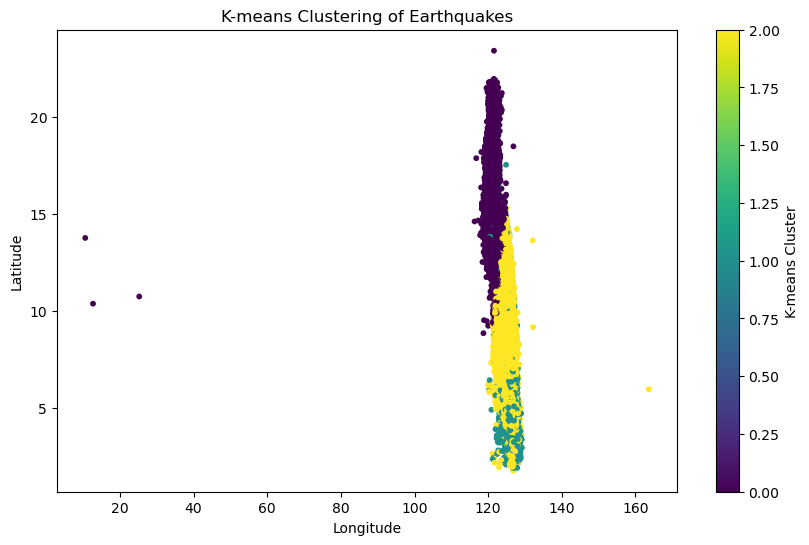

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(features_scaled)
data['KMeans_Cluster'] = kmeans_clusters

plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['KMeans_Cluster'], cmap='viridis', s=10)
plt.colorbar(label='K-means Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Earthquakes')
plt.show()

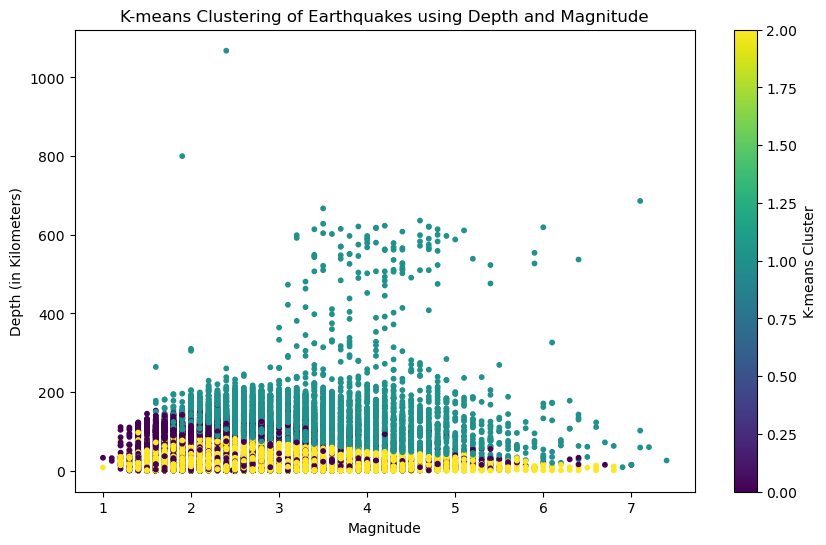

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Magnitude'], data['Depth_In_Km'], c=data['KMeans_Cluster'], cmap='viridis', s=10)
plt.colorbar(label='K-means Cluster')
plt.xlabel('Magnitude')
plt.ylabel('Depth (in Kilometers)')
plt.title('K-means Clustering of Earthquakes using Depth and Magnitude')
plt.show()

In [ ]:

# kmeans_silhouette = silhouette_score(features_scaled, data['KMeans_Cluster'])

for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, clusters)
    print(f"Silhouette Score for {n} clusters: {score}")

Silhouette Score for 2 clusters: 0.4120543397501865
Silhouette Score for 3 clusters: 0.4318403452717483
Silhouette Score for 4 clusters: 0.37024717482776365
Silhouette Score for 5 clusters: 0.2892672455437243
Silhouette Score for 6 clusters: 0.2799362405418555
Silhouette Score for 7 clusters: 0.30957972363001063
Silhouette Score for 8 clusters: 0.31423857749779105
Silhouette Score for 9 clusters: 0.29532398682543587


In [41]:
cluster_summary_kmeans = data.groupby('KMeans_Cluster')[['Latitude', 'Longitude', 'Depth_In_Km', 'Magnitude']].mean() 
print("K-Means Cluster Summary:\n", cluster_summary_kmeans)

print()

cluster_summary_dbscan = data[data['DBScan_Cluster'] != -1].groupby('DBScan_Cluster')[['Latitude', 'Longitude', 'Depth_In_Km', 'Magnitude']].mean()
print("DBScan Cluster Summary:\n", cluster_summary_dbscan)

K-Means Cluster Summary:
                  Latitude   Longitude  Depth_In_Km  Magnitude
KMeans_Cluster                                               
0               15.727308  120.904911    29.323350   2.376915
1                6.872545  125.668879   132.080329   3.176148
2                8.574851  125.610003    19.816627   2.582562

DBScan Cluster Summary:
                  Latitude   Longitude  Depth_In_Km  Magnitude
DBScan_Cluster                                               
0               10.883968  124.031718    29.459997   2.544558
1                4.718750  123.366250   578.625000   4.316667
2                5.382857  123.930000   543.428571   3.728571
3                3.898571  124.867857   321.714286   3.585714
4                6.880000  123.760000   608.428571   3.528571
5                3.501667  124.871667   285.166667   3.866667
6                4.664000  124.120667   504.933333   4.286667
7                2.406000  121.574000    36.400000   4.320000
8               13

In [25]:

# kmeans_silhouette = silhouette_score(features_scaled, data['KMeans_Cluster'])

for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, clusters)
    print(f"Silhouette Score for {n} clusters: {score}")

Silhouette Score for 2 clusters: 0.4120543397501865
Silhouette Score for 3 clusters: 0.4318403452717483
Silhouette Score for 4 clusters: 0.37024717482776365
Silhouette Score for 5 clusters: 0.2892672455437243
Silhouette Score for 6 clusters: 0.2799362405418555
Silhouette Score for 7 clusters: 0.30957972363001063
Silhouette Score for 8 clusters: 0.31423857749779105
Silhouette Score for 9 clusters: 0.29532398682543587


In [24]:
filtered_data = data[data['DBScan_Cluster'] != -1]
filtered_features = features_scaled[data['DBScan_Cluster'] != -1]
filtered_clusters = filtered_data['DBScan_Cluster']

dbscan_silhouette = silhouette_score(filtered_features, filtered_clusters)
print(f"DBScan Silhouette Score (excluding noise): {dbscan_silhouette}")

DBScan Silhouette Score (excluding noise): 0.23123375633288382


In [42]:
import folium

m = folium.Map(location=[12.8797, 121.7740], zoom_start=6)

for idx, row in data.iterrows():
    if 5 <= row['Latitude'] <= 20 and 115 <= row['Longitude'] <= 130:
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=2,
            color=f"#{(row['DBScan_Cluster'] + 2) * 100:02x}00",  
            fill=True,
            popup=f"Magnitude: {row['Magnitude']}, Depth: {row['Depth_In_Km']} km"
        ).add_to(m)

m.save('philippines_earthquake_map.html')